# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

'''from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe()) '''

## Paso 1: Carga del conjunto de datos


In [1]:
# Example importing the CSV here
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
dataframe

age          job  marital            education  default housing loan   
0       56    housemaid  married             basic.4y       no      no   no  \
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous   
0      telephone   may         mon  ...         1    999         0  \
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m   
0      nonexistent          1.1          93.994          -36.4      4.857  \
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

## Paso 2: Realiza un EDA completo


In [2]:
# Obtener las dimensiones
dataframe.shape


(41188, 21)

El dataframe tiene 41,188 filas y 21 columnas.

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [5]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

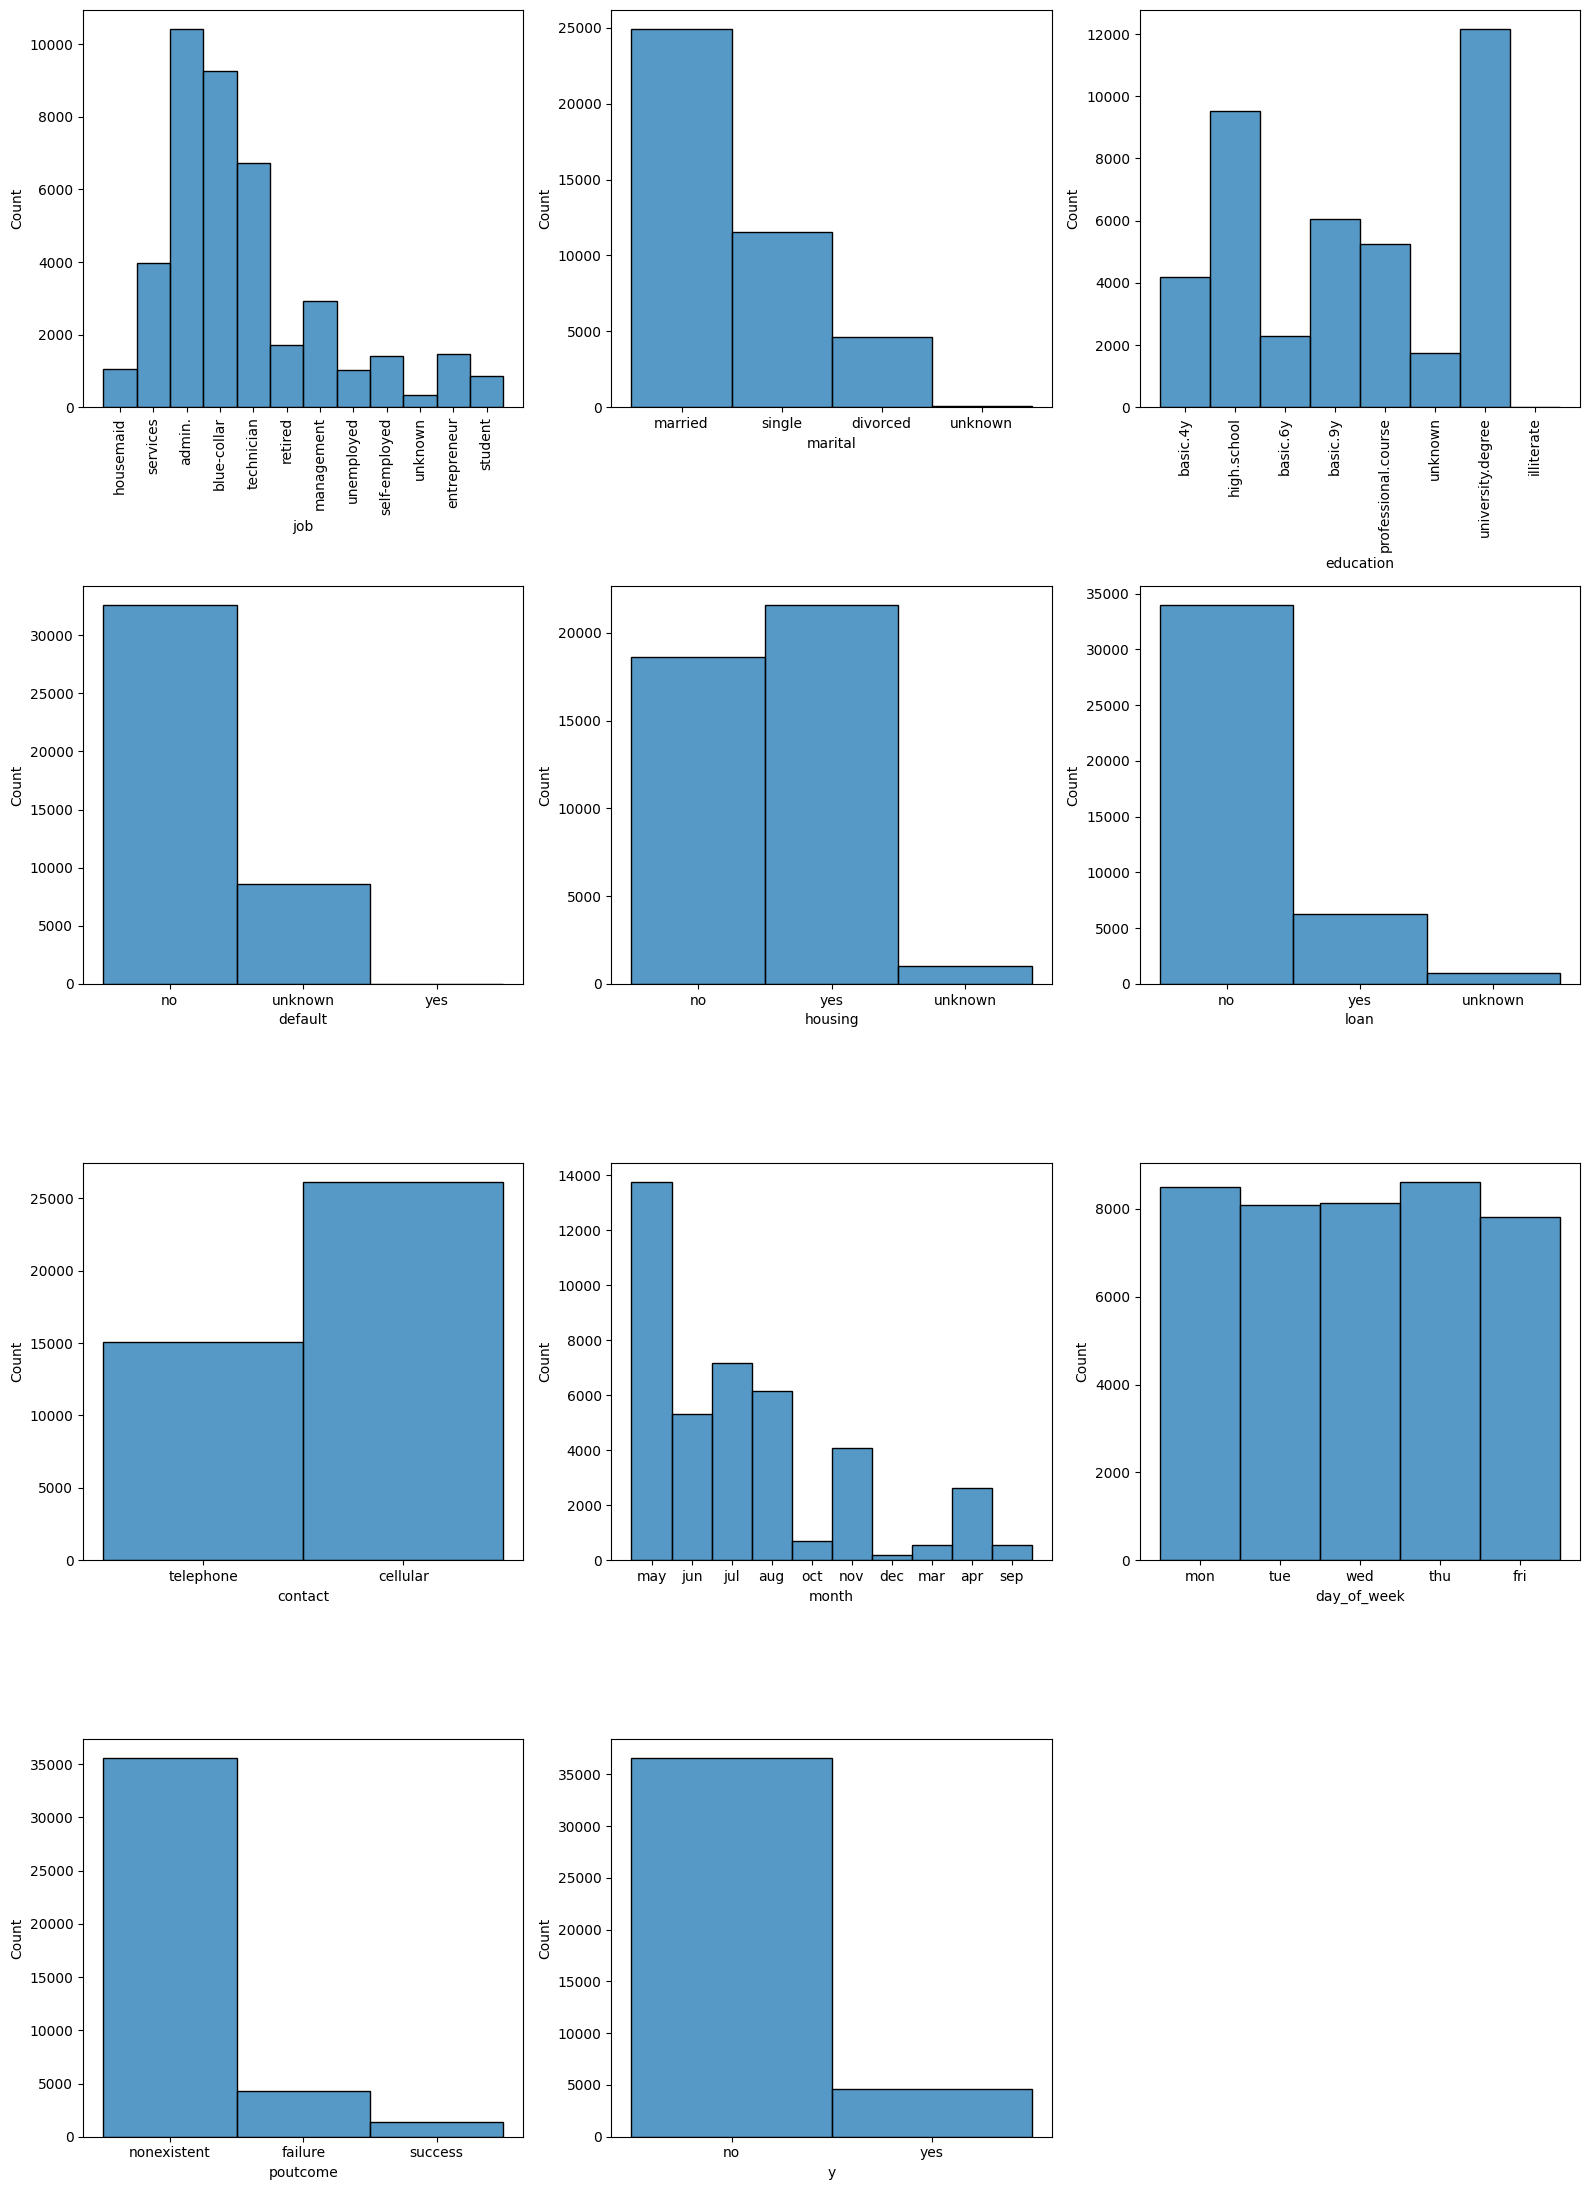

In [6]:
#Análisis sobre variables categóricas


import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(4, 3, figsize=(16, 22))

# Crear histograma
sns.histplot(ax=axes[0, 0], data=dataframe, x='job')
axes[0, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[0, 1], data=dataframe, x='marital')
sns.histplot(ax=axes[0, 2], data=dataframe, x='education')
axes[0, 2].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[1, 0], data=dataframe, x='default')
sns.histplot(ax=axes[1, 1], data=dataframe, x='housing')
sns.histplot(ax=axes[1, 2], data=dataframe, x='loan')
sns.histplot(ax=axes[2, 0], data=dataframe, x='contact')
sns.histplot(ax=axes[2, 1], data=dataframe, x='month')
sns.histplot(ax=axes[2, 2], data=dataframe, x='day_of_week')
sns.histplot(ax=axes[3, 0], data=dataframe, x='poutcome')
sns.histplot(ax=axes[3, 1], data=dataframe, x='y')

# Eliminar subplots vacío
fig.delaxes(axes[3, 2])

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Job: El trabajo más común en los registros es "admin.", seguido por "blue-collar" y "technician".
- Marital: La mayoría de las personas en el conjunto de datos están casadas.
- Education: La mayoría de las personas tienen una educación "university.degree", seguida de "high.school" y "basic.9y".
- Default (Incumplimiento de crédito): La gran mayoría de los registros no tienen incumplimiento de crédito.
- Housing: La mayoría de las personas tienen un préstamo de vivienda.
- Loan: La mayoría de las personas no tienen un préstamo personal.
- Contact: La mayoría de los registros tienen contacto a través del teléfono movil.
- Month: Los meses con más contactos son "may," "jul," y "aug," lo que sugiere que hay una mayor actividad de marketing.
- Day_of_week: No hay grandes diferencias en la distribución de los contactos en diferentes días de la semana, aunque hay una ligera disminución de contactos durante los fines de semana.
- Poutcome: La mayoría de los registros muestran "nonexistent," lo que indica que no hubo un contacto anterior con estos clientes. Un número menor muestra "success" y solo unos pocos tienen "failure" en la campaña anterior.
- Y (Objetivo): Muestra que la mayoría de los clientes no se suscribieron al depósito a plazo fijo.

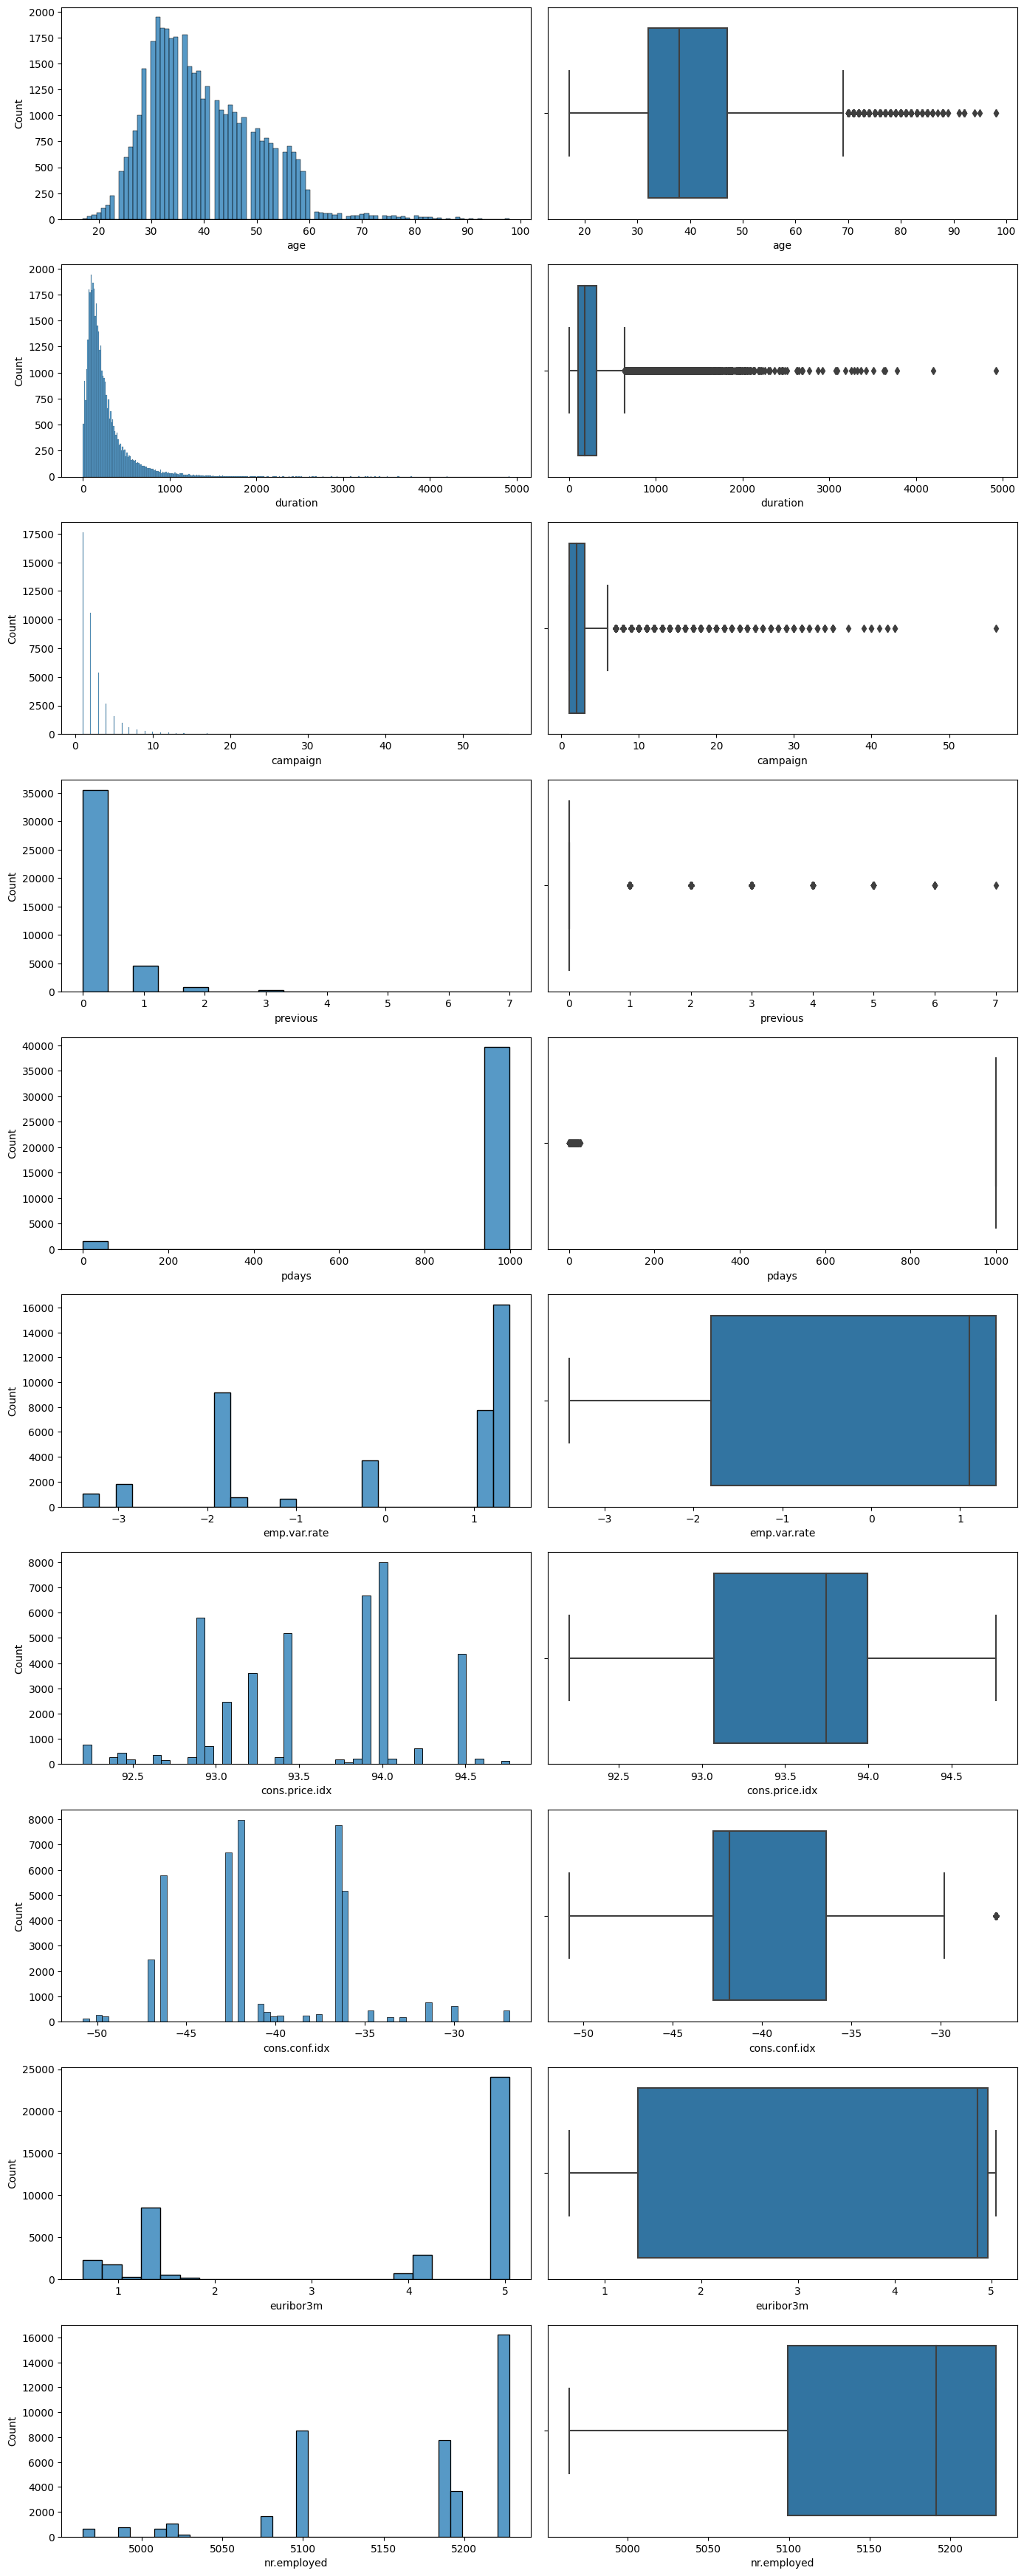

In [7]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(10, 2, figsize=(14, 35))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="age")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="age")
sns.histplot(ax=axis[1, 0], data=dataframe, x="duration")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="duration")
sns.histplot(ax=axis[2, 0], data=dataframe, x="campaign")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="campaign")
sns.histplot(ax=axis[3, 0], data=dataframe, x="previous")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="previous")
sns.histplot(ax=axis[4, 0], data=dataframe, x="pdays")
sns.boxplot(ax=axis[4, 1], data=dataframe, x="pdays")
sns.histplot(ax=axis[5, 0], data=dataframe, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="emp.var.rate")
sns.histplot(ax=axis[6, 0], data=dataframe, x="cons.price.idx")
sns.boxplot(ax=axis[6, 1], data=dataframe, x="cons.price.idx")
sns.histplot(ax=axis[7, 0], data=dataframe, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=dataframe, x="cons.conf.idx")
sns.histplot(ax=axis[8,0], data=dataframe, x='euribor3m')
sns.boxplot(ax=axis[8 ,1], data=dataframe, x='euribor3m')
sns.histplot(ax=axis[9 ,0], data=dataframe, x='nr.employed')
sns.boxplot(ax=axis[9 ,1], data=dataframe, x='nr.employed')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Age:
El histograma muestra que la mayoría de los clientes tienen edades comprendidas entre aproximadamente 25 y 60 años, con un pico alrededor de los 30-35 años.
El diagrama de caja muestra que no hay valores atípicos significativos y que la mediana se encuentra alrededor de los 40 años.
- Duration:
El histograma muestra una distribución sesgada hacia la derecha, lo que sugiere que la mayoría de las llamadas tienen una duración más corta, pero también hay un número considerable de llamadas más largas.
El diagrama de caja muestra la presencia de valores atípicos, lo que indica que hay llamadas excepcionalmente largas en comparación con la mayoría.
- Campaign:
El histograma muestra que la mayoría de los clientes fueron contactados solo una o dos veces durante la campaña.
El diagrama de caja muestra que hay valores atípicos en el número de contactos, lo que indica que algunos clientes fueron contactados muchas veces durante la campaña.
- Previous:
El histograma muestra que la mayoría de los clientes no fueron contactados antes de esta campaña, ya que el valor es "0" en la mayoría de los casos.
El diagrama de caja muestra que hay valores atípicos en el número de contactos previos, lo que indica que algunos clientes fueron contactados muchas veces antes de esta campaña.
- Pdays:
El histograma muestra que la mayoría de los clientes no fueron contactados en una campaña anterior ("999" es el valor más común).
El diagrama de caja muestra que hay valores atípicos en el número de días pasados desde el último contacto, lo que indica que algunos clientes fueron contactados hace mucho tiempo.
- Emp.var.rate:
El histograma muestra que la tasa de variación del empleo tiende a agruparse en torno a ciertos valores.
El diagrama de caja muestra que hay valores atípicos en la tasa de variación del empleo.
- Cons.price.idx:
El histograma muestra que el índice de precios al consumidor está distribuido en ciertos rangos.
El diagrama de caja muestra que no hay valores atípicos significativos.
- Cons.conf.idx:
El histograma muestra que el índice de confianza del consumidor tiende a agruparse en ciertos valores.
El diagrama de caja muestra la presencia de algunos valores atípicos.
- Euribor3m:
El histograma muestra que la tasa Euribor a 3 meses tiende a agruparse en torno a ciertos valores.
El diagrama de caja muestra la presencia de algunos valores atípicos.
- Nr.employed:
El histograma muestra que el número de empleados tiende a agruparse en ciertos valores.
El diagrama de caja muestra la presencia de algunos valores atípicos.

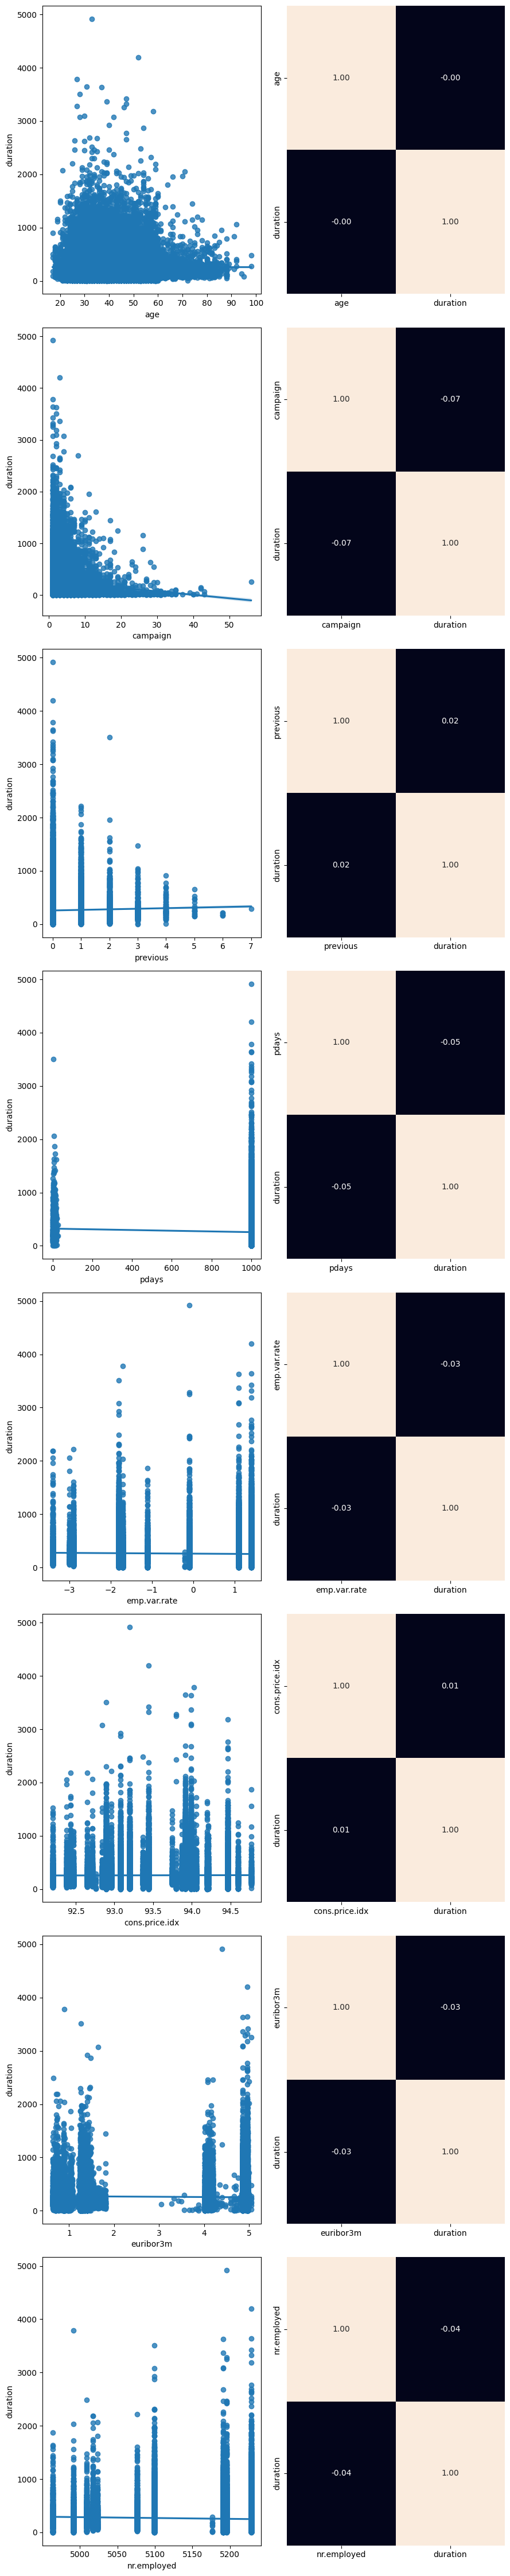

In [8]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 9 filas y 2 columnas
fig, axis = plt.subplots(8, 2, figsize=(9, 45))

# Gráfico de dispersión y correlación entre "age" y "duration"
sns.regplot(ax=axis[0, 0], data=dataframe, x="age", y="duration")
sns.heatmap(dataframe[["age", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "campaign" y "duration"
sns.regplot(ax=axis[1, 0], data=dataframe, x="campaign", y="duration")
sns.heatmap(dataframe[["campaign", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "previous" y "duration"
sns.regplot(ax=axis[2, 0], data=dataframe, x="previous", y="duration")
sns.heatmap(dataframe[["previous", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "pdays" y "duration"
sns.regplot(ax=axis[3, 0], data=dataframe, x="pdays", y="duration")
sns.heatmap(dataframe[["pdays", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)
axis[3, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "emp.var.rate" y "duration"
sns.regplot(ax=axis[4, 0], data=dataframe, x="emp.var.rate", y="duration")
sns.heatmap(dataframe[["emp.var.rate", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)
axis[4, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "cons.price.idx" y "duration"
sns.regplot(ax=axis[5, 0], data=dataframe, x="cons.price.idx", y="duration")
sns.heatmap(dataframe[["cons.price.idx", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)
axis[5, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "euribor3m" y "duration"
sns.regplot(ax=axis[6, 0], data=dataframe, x="euribor3m", y="duration")
sns.heatmap(dataframe[["euribor3m", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[6, 1], cbar=False)
axis[6, 0].set_ylabel("duration")

# Gráfico de dispersión y correlación entre "nr.employed" y "duration"
sns.regplot(ax=axis[7, 0], data=dataframe, x="nr.employed", y="duration")
sns.heatmap(dataframe[["nr.employed", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[7, 1], cbar=False)
axis[7, 0].set_ylabel("duration")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No parece haber una correlación clara en ninguna variable

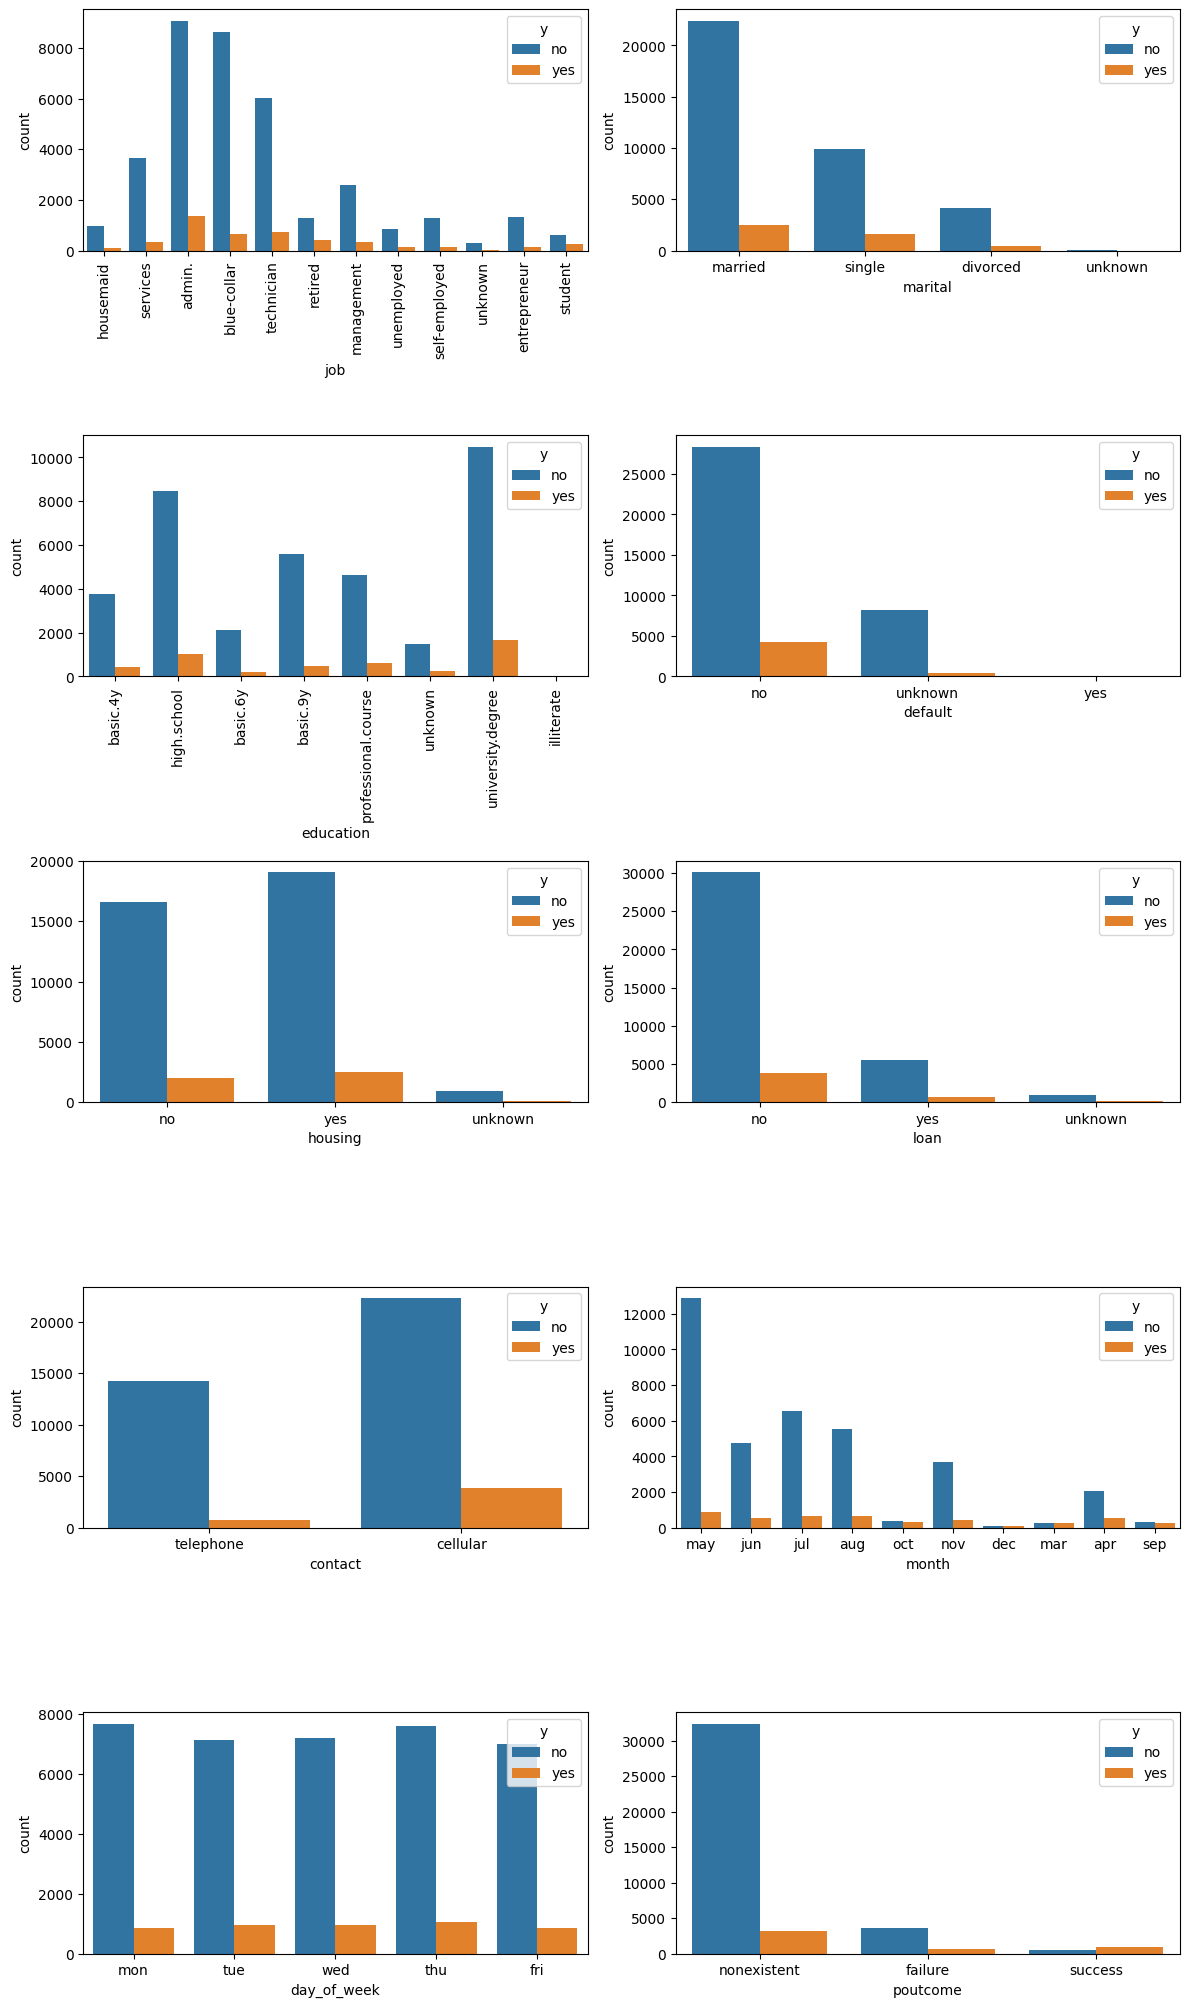

In [9]:
#Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(6, 2, figsize=(12, 24))

# Gráficos de conteo para las variables categóricas con "hue" en "y"
sns.countplot(ax=axis[0, 0], data=dataframe, x='job', hue='y')
axis[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axis[0, 1], data=dataframe, x='marital', hue='y')
sns.countplot(ax=axis[1, 0], data=dataframe, x='education', hue='y')
axis[1, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axis[1, 1], data=dataframe, x='default', hue='y')
sns.countplot(ax=axis[2, 0], data=dataframe, x='housing', hue='y')
sns.countplot(ax=axis[2, 1], data=dataframe, x='loan', hue='y')
sns.countplot(ax=axis[3, 0], data=dataframe, x='contact', hue='y')
sns.countplot(ax=axis[3, 1], data=dataframe, x='month', hue='y')
sns.countplot(ax=axis[4, 0], data=dataframe, x='day_of_week', hue='y')
sns.countplot(ax=axis[4, 1], data=dataframe, x='poutcome', hue='y')

# Eliminar subplots vacíos
fig.delaxes(axis[5, 0])
fig.delaxes(axis[5, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

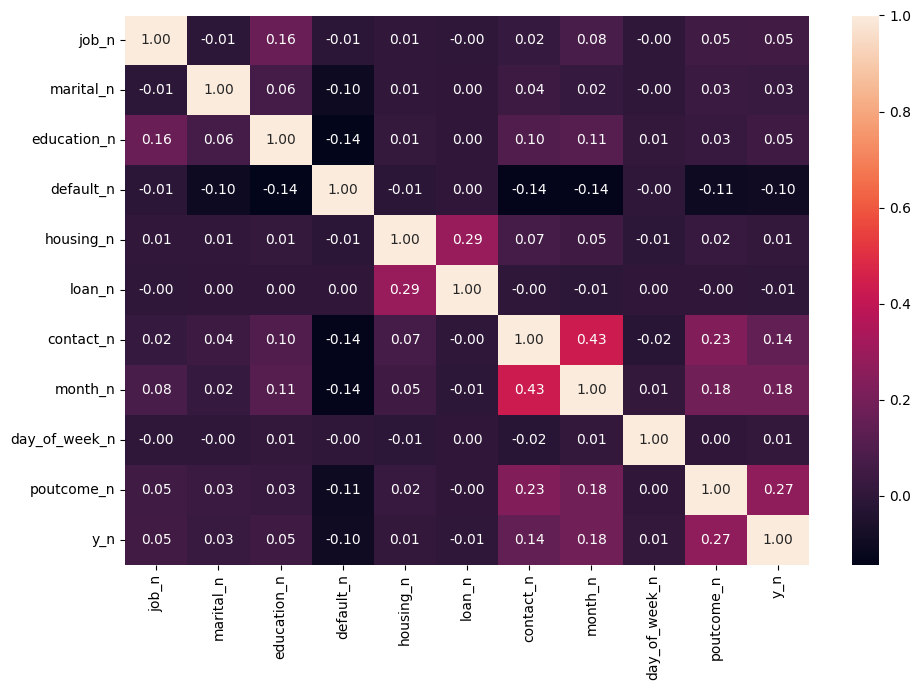

In [13]:
#Análisis categórico a numerico (completo y OPCIONAL) con facotorize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Convert categorical columns to numerical using factorize
dataframe_copy['job_n'] = pd.factorize(dataframe_copy['job'])[0]
dataframe_copy['marital_n'] = pd.factorize(dataframe_copy['marital'])[0]
dataframe_copy['education_n'] = pd.factorize(dataframe_copy['education'])[0]
dataframe_copy['default_n'] = pd.factorize(dataframe_copy['default'])[0]
dataframe_copy['housing_n'] = pd.factorize(dataframe_copy['housing'])[0]
dataframe_copy['loan_n'] = pd.factorize(dataframe_copy['loan'])[0]
dataframe_copy['contact_n'] = pd.factorize(dataframe_copy['contact'])[0]
dataframe_copy['month_n'] = pd.factorize(dataframe_copy['month'])[0]
dataframe_copy['day_of_week_n'] = pd.factorize(dataframe_copy['day_of_week'])[0]
dataframe_copy['poutcome_n'] = pd.factorize(dataframe_copy['poutcome'])[0]
dataframe_copy['y_n'] = pd.factorize(dataframe_copy['y'])[0]

# Plot the correlation heatmap
fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(dataframe_copy[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()


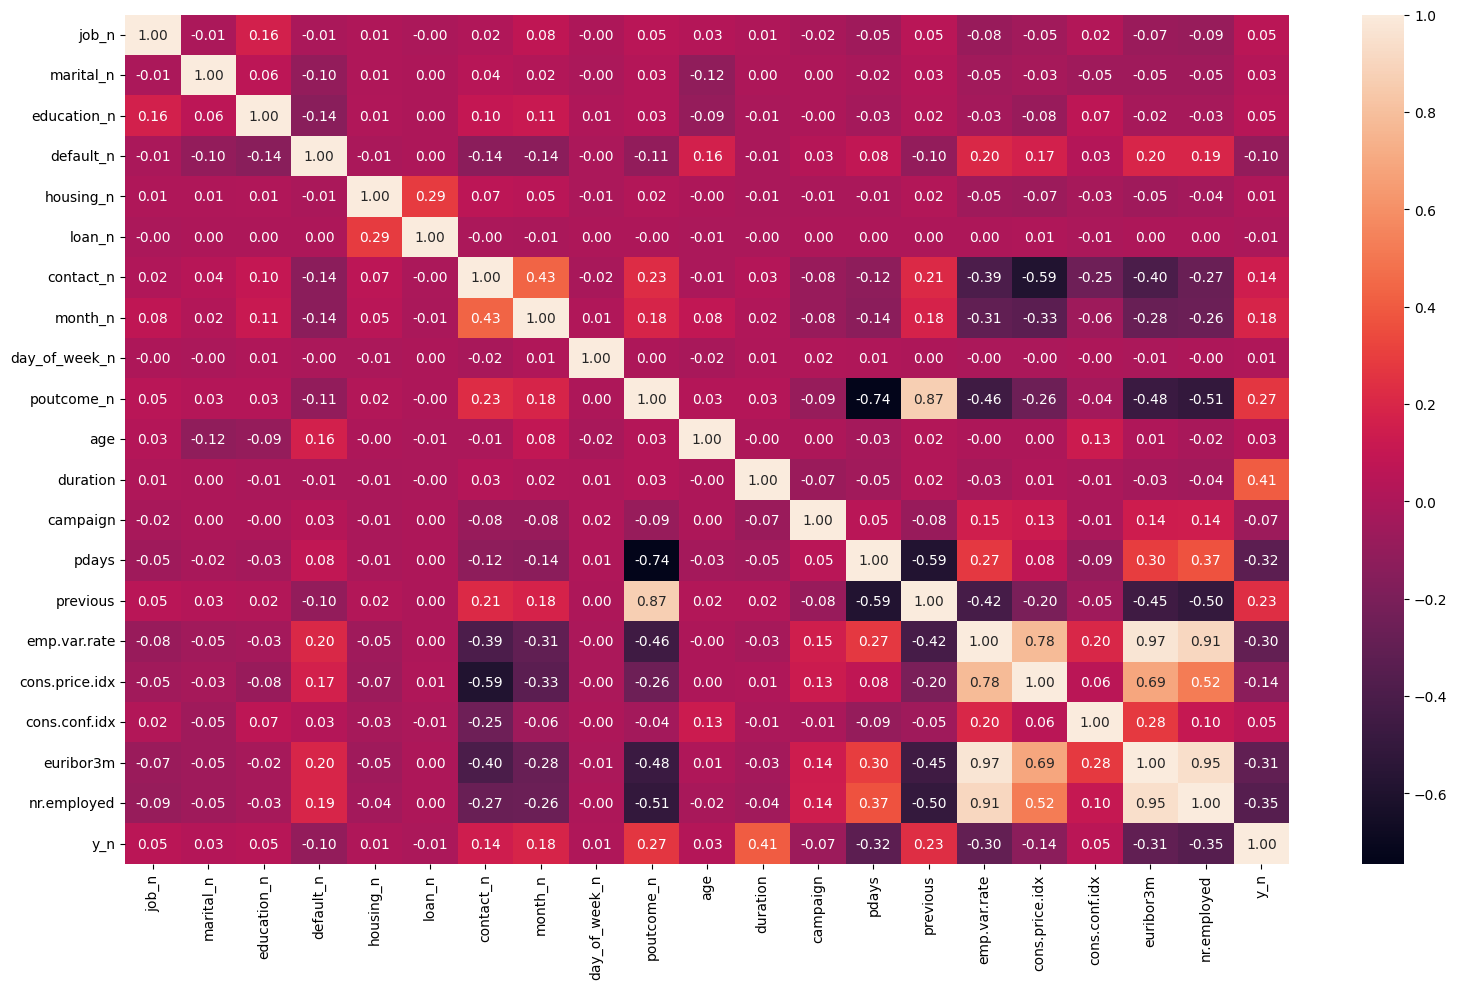

In [12]:
# Heatmap

# Draw a Canvas
fig, axis = plt.subplots(figsize = (16, 10))

# Plot a Heatmap
sns.heatmap(dataframe[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n',
                       'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed', 'y_n']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

Las variables categóricas ("job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n") no muestran una correlación fuerte con ninguna de las otras variables, incluida la variable objetivo "y_n" (suscripción al depósito a plazo fijo). Esto sugiere que estas variables categóricas no tienen una relación lineal significativa con otras características del conjunto de datos.

Las variables numéricas ("age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed") tampoco muestran fuertes correlaciones entre sí. Sin embargo, algunas correlaciones notables son:

"emp.var.rate" y "euribor3m" tienen una correlación negativa moderada, lo que sugiere que están relacionadas inversamente en algún grado.
"nr.employed" muestra una correlación negativa moderada con "emp.var.rate" y "euribor3m", lo que indica que estos factores pueden estar relacionados con la tasa de empleo.
"duration" y "previous" tienen una correlación positiva débil, lo que sugiere que puede haber una relación entre la duración de la última llamada y el número de contactos realizados antes de esta campaña.
La variable objetivo "y_n" (suscripción al depósito a plazo fijo) muestra correlaciones débiles con las variables numéricas y las variables categóricas. Esto indica que ninguna de las características tiene una correlación lineal fuerte con la suscripción al depósito a plazo fijo.

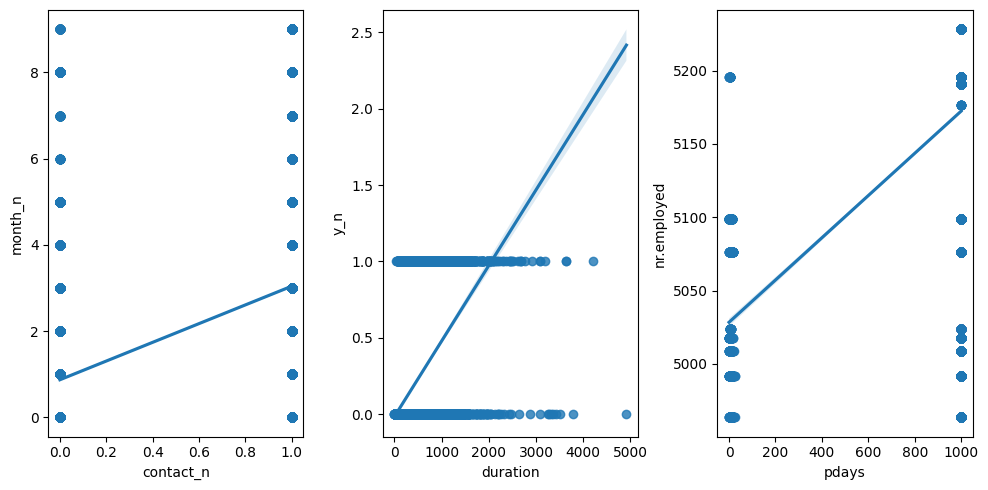

In [14]:
#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = dataframe, x = "contact_n", y = "month_n")
sns.regplot(ax = axis[1], data = dataframe, x = "duration", y = "y_n")
sns.regplot(ax = axis[2], data = dataframe, x = "pdays", y = "nr.employed")

plt.tight_layout()

plt.show()

- Contact_n vs. Month_n:
La gráfica muestra una dispersión de puntos que no sigue una tendencia clara, lo que indica que las variables "contact_n" (tipo de contacto) y "month_n" (mes del contacto) no tienen una correlación lineal significativa. Ambas variables numéricas representan categorías de las variables categóricas "contact" y "month", respectivamente.
- Duration vs. y_n (Suscripción al depósito a plazo fijo):
La gráfica muestra una tendencia clara donde a medida que la duración de la última llamada aumenta, la probabilidad de suscripción ("y_n" = 1) también aumenta. Esto sugiere que las llamadas más largas están asociadas con una mayor probabilidad de que el cliente se suscriba al depósito a plazo fijo.
- Pdays vs. Nr.employed (Número de empleados):
La gráfica muestra una dispersión de puntos que no sigue una tendencia clara, lo que indica que las variables "pdays" (número de días que pasaron después del último contacto en una campaña anterior) y "nr.employed" (número de empleados) no tienen una correlación lineal significativa.

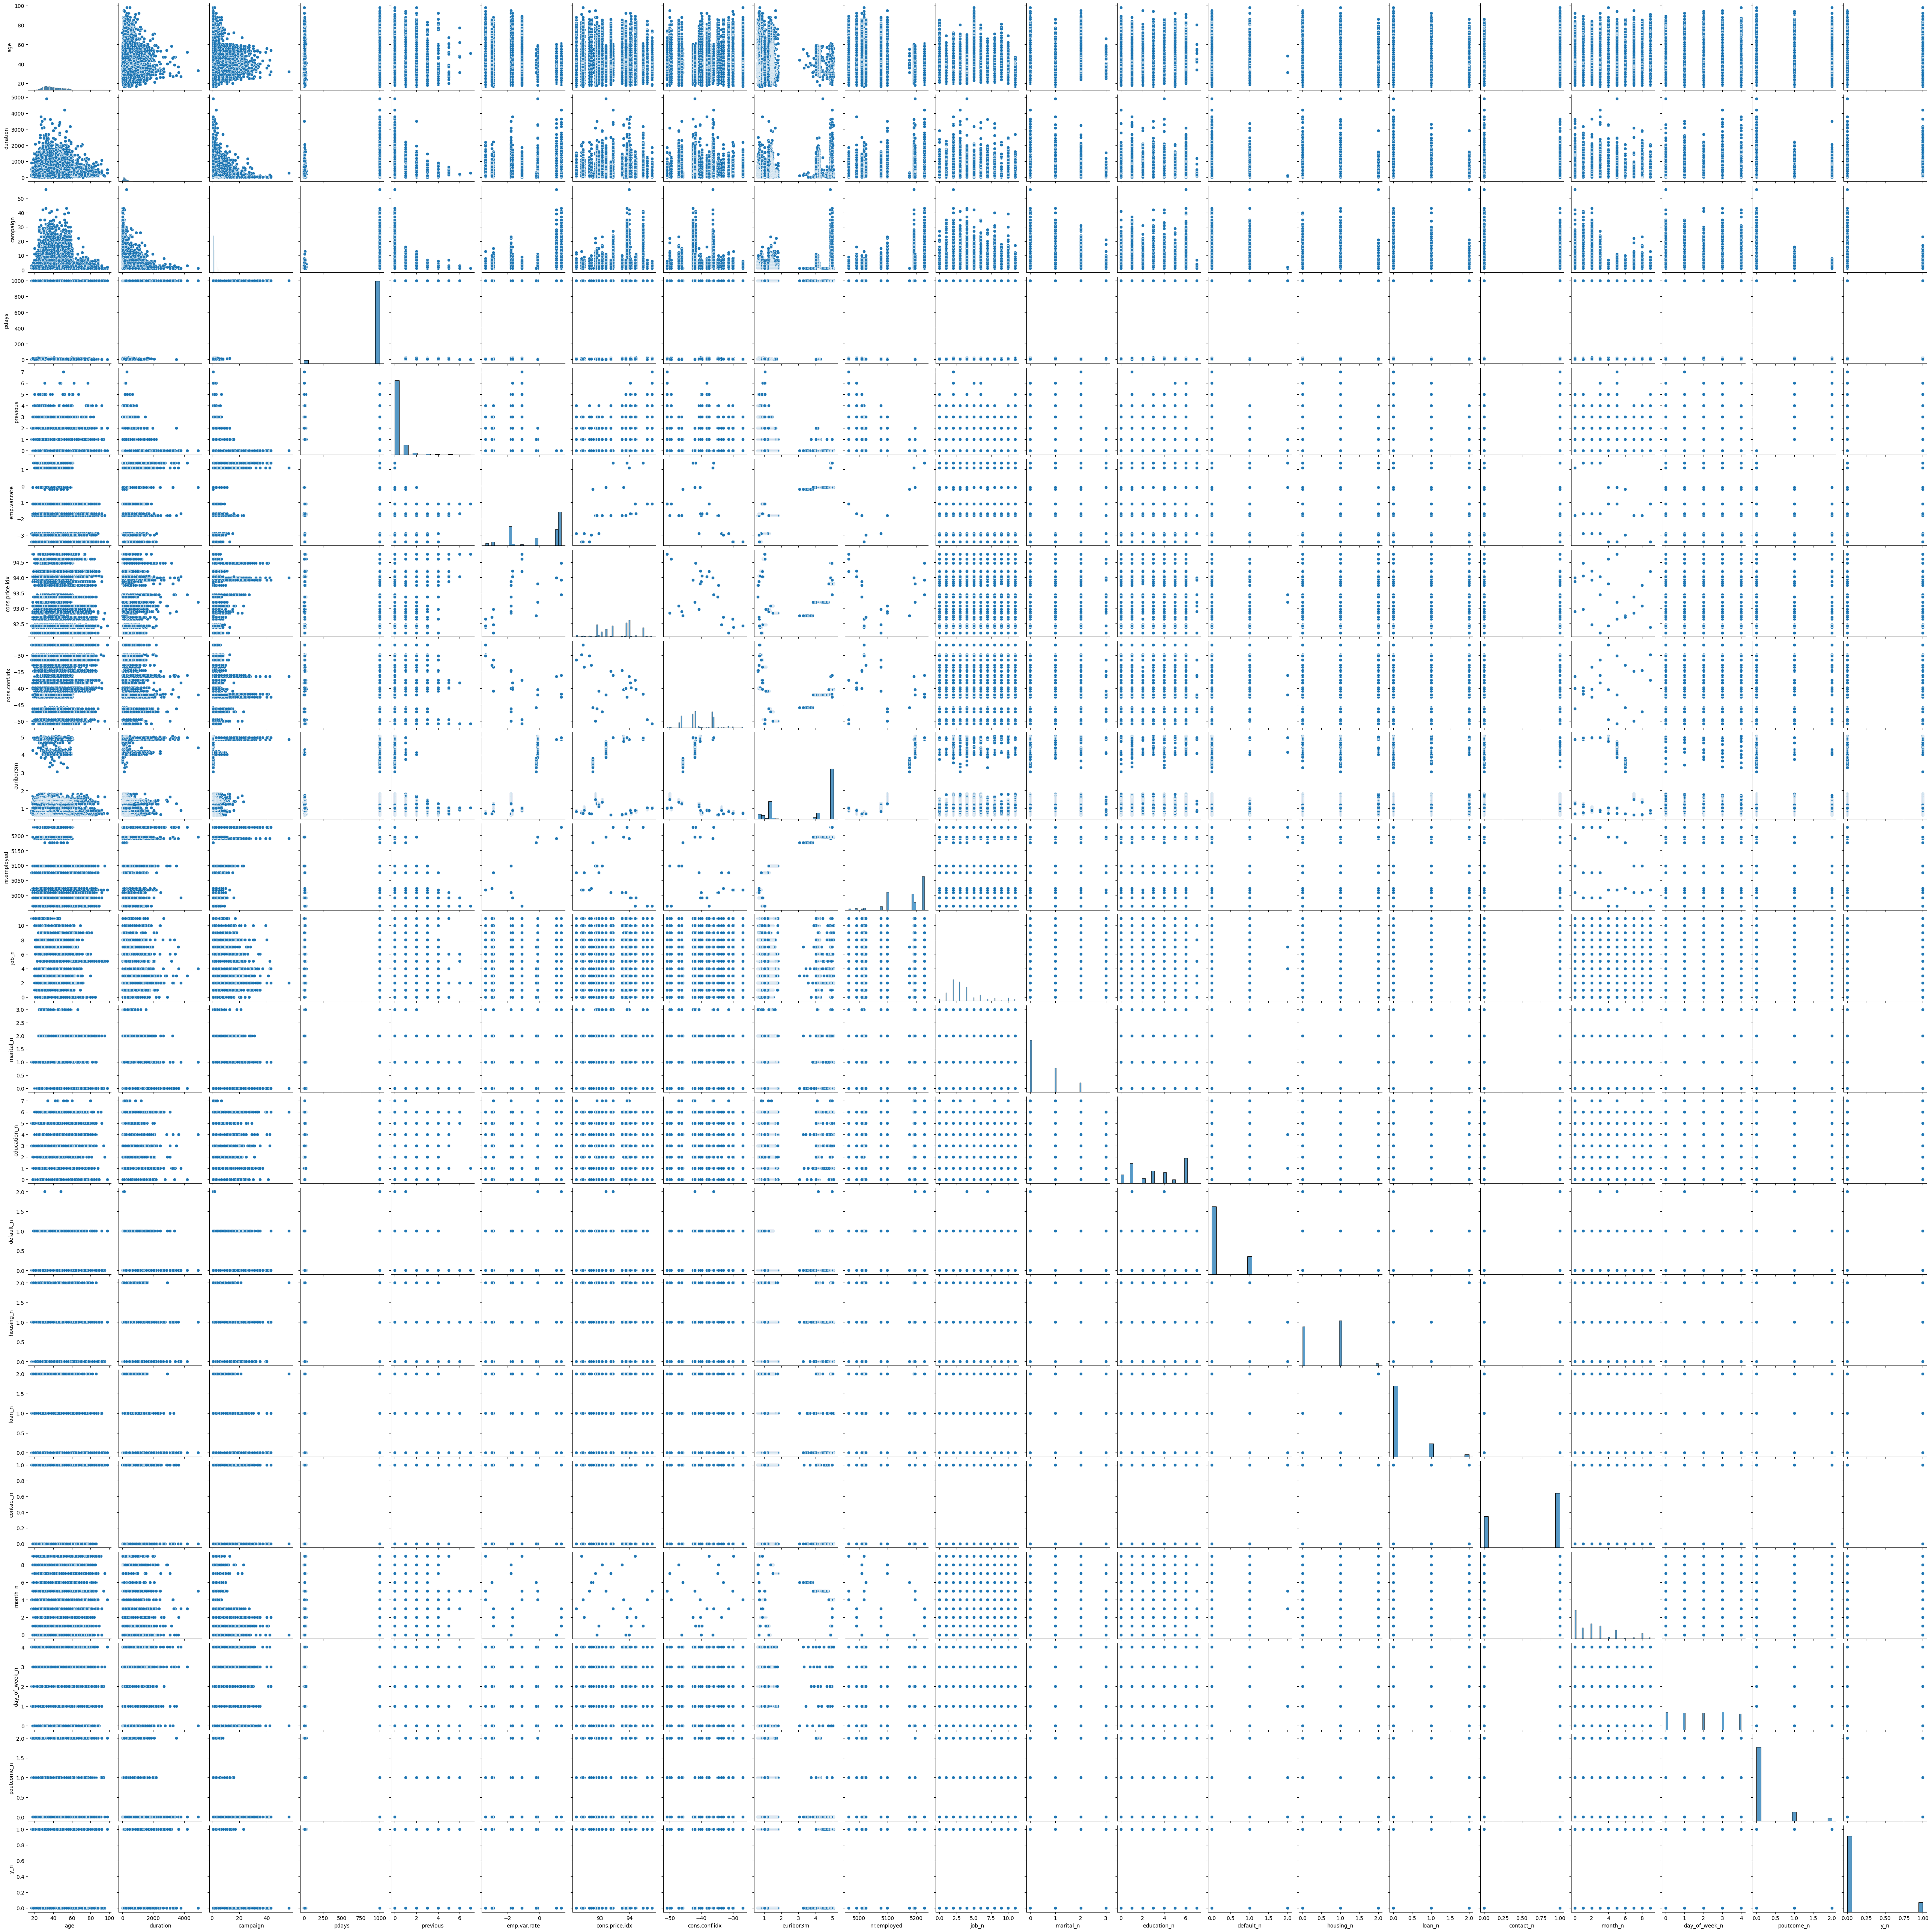

In [14]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [15]:
#análisis descriptivo

dataframe.describe()

age      duration      campaign         pdays      previous   
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000  \
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   
count  41176.000000    41176.000000   41176.000000  41176.000000  \
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed  ...     marital_n   education_n     default_n   
count  41176.000000  ...  41176.000000  41176.000000  41176.000000  \
mean    5167.034870  ...      0.510637      3.277370      0.208908   
std       72.251364  ...      0.696794      2.185558      0.406713   
min     4963.600000  ...      0.000000      0.000000      0.000000   
25%     5099.100000  ...      0.000000      1.000000      0.000000   
50%     5191.000000  ...      0.000000      3.000000      0.000000   
75%     5228.100000  ...      1.000000      6.000000      0.000000   
max     5228.100000  ...      3.000000      7.000000      2.000000   

          housing_n        loan_n     contact_n       month_n  day_of_week_n   
count  41176.000000  41176.000000  41176.000000  41176.000000   41176.000000  \
mean       0.571959      0.199825      0.634714      2.249951       1.979600   
std        0.541216      0.456055      0.481516      2.429157       1.411539   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       1.000000   
50%        1.000000      0.000000      1.000000      2.000000       2.000000   
75%        1.000000      0.000000      1.000000      3.000000       3.000000   
max        2.000000      2.000000      1.000000      9.000000       4.000000   

         poutcome_n           y_n  
count  41176.000000  41176.000000  
mean       0.169953      0.112663  
std        0.455811      0.316184  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 21 columns]

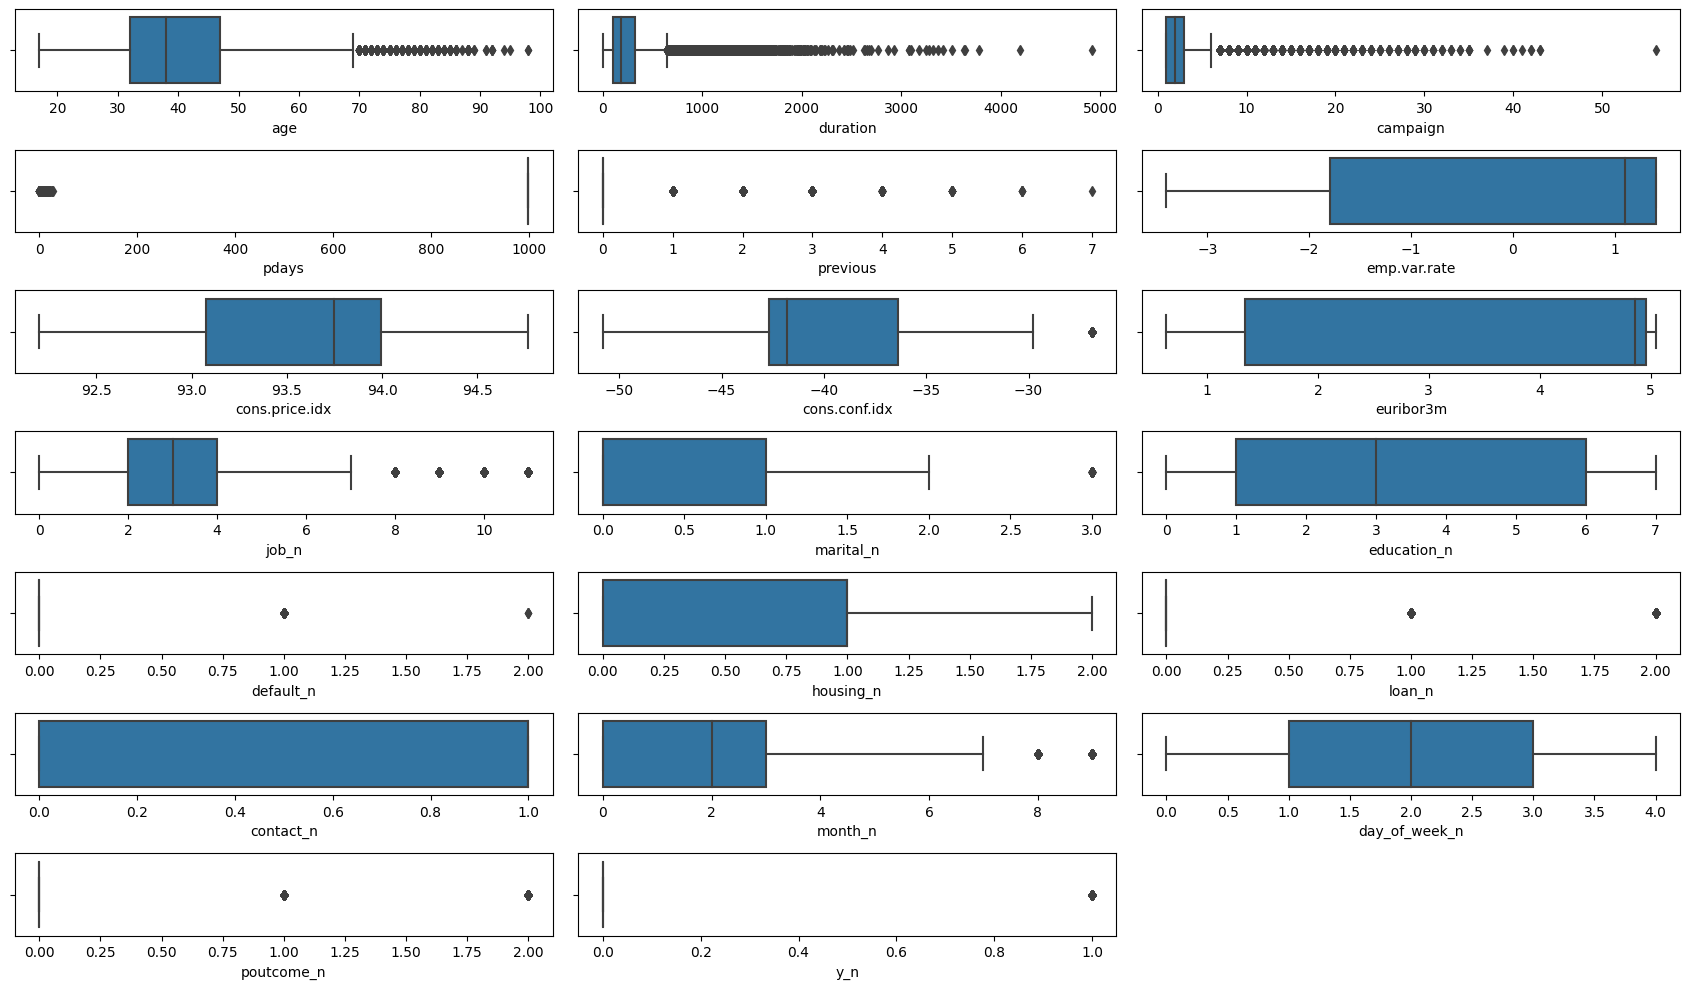

In [16]:
#Buscar outliers

fig, axis = plt.subplots(7, 3, figsize=(17,10))

sns.boxplot(ax=axis[0,0], data=dataframe, x='age')
sns.boxplot(ax=axis[0,1], data=dataframe, x='duration')
sns.boxplot(ax=axis[0,2], data=dataframe, x='campaign')
sns.boxplot(ax=axis[1,0], data=dataframe, x='pdays')
sns.boxplot(ax=axis[1,1], data=dataframe, x='previous')
sns.boxplot(ax=axis[1,2], data=dataframe, x='emp.var.rate')
sns.boxplot(ax=axis[2,0], data=dataframe, x='cons.price.idx')
sns.boxplot(ax=axis[2,1], data=dataframe, x='cons.conf.idx')
sns.boxplot(ax=axis[2,2], data=dataframe, x='euribor3m')
sns.boxplot(ax=axis[3,0], data=dataframe, x='job_n')
sns.boxplot(ax=axis[3,1], data=dataframe, x='marital_n')
sns.boxplot(ax=axis[3,2], data=dataframe, x='education_n')
sns.boxplot(ax=axis[4,0], data=dataframe, x='default_n')
sns.boxplot(ax=axis[4,1], data=dataframe, x='housing_n')
sns.boxplot(ax=axis[4,2], data=dataframe, x='loan_n')
sns.boxplot(ax=axis[5,0], data=dataframe, x='contact_n')
sns.boxplot(ax=axis[5,1], data=dataframe, x='month_n')
sns.boxplot(ax=axis[5,2], data=dataframe, x='day_of_week_n')
sns.boxplot(ax=axis[6,0], data=dataframe, x='poutcome_n')
sns.boxplot(ax=axis[6,1], data=dataframe, x='y_n')
fig.delaxes(axis[6,2])

plt.tight_layout()

plt.show()

In [17]:
#analizar outliers age

age_stats = dataframe["age"].describe()
print(age_stats)


fare_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * fare_iqr
lower_limit = age_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en age son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en age son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [18]:
#analizar outliers duration

duration_stats = dataframe["duration"].describe()
print(duration_stats)


fare_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * fare_iqr
lower_limit = duration_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en duration son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en duration son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [19]:
#analizar outliers campaign

campaign_stats = dataframe["campaign"].describe()
print(campaign_stats)


fare_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * fare_iqr
lower_limit = campaign_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en campaign son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en campaign son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [20]:
#Análisis de valores faltantes

dataframe.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
y_n               0
dtype: int64

In [21]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n',
                'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed', 'y_n']


norm_features = scaler.fit_transform(dataframe[num_variables])

dataframe_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
dataframe_norm.head()




job_n  marital_n  education_n  default_n  housing_n    loan_n   
0 -1.496903  -0.732848    -1.499576  -0.513657  -1.056816 -0.438165  \
1 -1.089456  -0.732848    -1.042021   1.945111  -1.056816 -0.438165   
2 -1.089456  -0.732848    -1.042021  -0.513657   0.790896 -0.438165   
3 -0.682010  -0.732848    -0.584467  -0.513657  -1.056816 -0.438165   
4 -1.089456  -0.732848    -1.042021  -0.513657  -1.056816  1.754578   

   contact_n   month_n  day_of_week_n  poutcome_n  ...  duration  campaign   
0  -1.318174 -0.926239      -1.402457   -0.372864  ...  0.010352 -0.565963  \
1  -1.318174 -0.926239      -1.402457   -0.372864  ... -0.421577 -0.565963   
2  -1.318174 -0.926239      -1.402457   -0.372864  ... -0.124626 -0.565963   
3  -1.318174 -0.926239      -1.402457   -0.372864  ... -0.413864 -0.565963   
4  -1.318174 -0.926239      -1.402457   -0.372864  ...  0.187751 -0.565963   

      pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m   
0  0.195443 -0.349551      0.648101        0.722628       0.886568   0.712463  \
1  0.195443 -0.349551      0.648101        0.722628       0.886568   0.712463   
2  0.195443 -0.349551      0.648101        0.722628       0.886568   0.712463   
3  0.195443 -0.349551      0.648101        0.722628       0.886568   0.712463   
4  0.195443 -0.349551      0.648101        0.722628       0.886568   0.712463   

   nr.employed       y_n  
0     0.331695 -0.356325  
1     0.331695 -0.356325  
2     0.331695 -0.356325  
3     0.331695 -0.356325  
4     0.331695 -0.356325  

[5 rows x 21 columns]

In [22]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n',
                'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed', 'y_n']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()

job_n  marital_n  education_n  default_n  housing_n  loan_n  contact_n   
0  0.000000        0.0     0.000000        0.0        0.0     0.0        0.0  \
1  0.090909        0.0     0.142857        0.5        0.0     0.0        0.0   
2  0.090909        0.0     0.142857        0.0        0.5     0.0        0.0   
3  0.181818        0.0     0.285714        0.0        0.0     0.0        0.0   
4  0.090909        0.0     0.142857        0.0        0.0     0.5        0.0   

   month_n  day_of_week_n  poutcome_n  ...  duration  campaign  pdays   
0      0.0            0.0         0.0  ...  0.053070       0.0    1.0  \
1      0.0            0.0         0.0  ...  0.030297       0.0    1.0   
2      0.0            0.0         0.0  ...  0.045954       0.0    1.0   
3      0.0            0.0         0.0  ...  0.030704       0.0    1.0   
4      0.0            0.0         0.0  ...  0.062424       0.0    1.0   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m   
0       0.0        0.9375        0.698753        0.60251   0.957379  \
1       0.0        0.9375        0.698753        0.60251   0.957379   
2       0.0        0.9375        0.698753        0.60251   0.957379   
3       0.0        0.9375        0.698753        0.60251   0.957379   
4       0.0        0.9375        0.698753        0.60251   0.957379   

   nr.employed  y_n  
0     0.859735  0.0  
1     0.859735  0.0  
2     0.859735  0.0  
3     0.859735  0.0  
4     0.859735  0.0  

[5 rows x 21 columns]

In [31]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = dataframe_scal.drop("y_n", axis = 1)
y = dataframe_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

poutcome_n  previous  emp.var.rate  euribor3m  nr.employed
0         0.0       0.0      1.000000   0.980730     1.000000
1         0.0       0.0      0.333333   0.138291     0.512287
2         0.0       0.0      0.937500   0.956926     0.859735
3         0.0       0.0      0.937500   0.957379     0.859735
4         0.0       0.0      0.333333   0.175924     0.512287

In [32]:
X_test_sel.head()

poutcome_n  previous  emp.var.rate  euribor3m  nr.employed
0         0.0  0.000000      0.104167   0.143278     0.425709
1         0.5  0.142857      0.333333   0.150759     0.512287
2         0.0  0.000000      0.479167   0.073679     0.000000
3         0.5  0.142857      0.333333   0.150759     0.512287
4         0.0  0.000000      1.000000   0.981410     1.000000

In [33]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_train.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_test.csv", index=False)

## Paso 3: Construye un modelo de regresión logística

In [34]:
#Paso 1: Lectura del conjunto de datos procesado

import pandas as pd

train_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_train.csv")
test_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_test.csv")

train_data.head()



poutcome_n  previous  emp.var.rate  euribor3m  nr.employed  y_n
0         0.0       0.0      1.000000   0.980730     1.000000  0.0
1         0.0       0.0      0.333333   0.138291     0.512287  0.0
2         0.0       0.0      0.937500   0.956926     0.859735  0.0
3         0.0       0.0      0.937500   0.957379     0.859735  0.0
4         0.0       0.0      0.333333   0.175924     0.512287  0.0

In [35]:
#El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad.
#Dividiremos también las predictoras de las características.


X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [36]:
#Paso 2: Inicialización y entrenamiento del modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
#Paso 3: Predicción del modelo

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8921806702282662

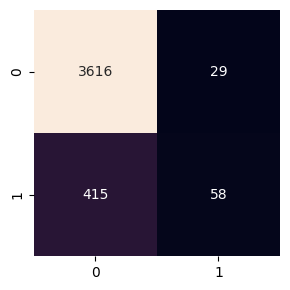

In [39]:
#es común que en los problemas de clasificación se construya una matriz de confusión (confussion matrix),
#que es una tabla que se organiza de tal manera que cada fila de la matriz representa las instancias
#de una clase predicha, mientras que cada columna representa las instancias de una clase real:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

deposito_largoplazo_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(deposito_largoplazo_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()


La interpretación de una matriz de confusión es la siguiente:

- Verdaderos positivos (TP): Se corresponde con el número 3616 y son los casos en los que el modelo predijo positivo y la clase real también es positiva.
- Verdaderos negativos (TN): Se corresponde con el número 415 y son los casos en los que el modelo predijo negativo y la clase real también es negativa.
- Falsos positivos (FP): Se corresponde con el número 58 y son los casos en los que el modelo predijo positivo y la clase real es negativa.
- Falsos negativos (FN): Se corresponde con el número 29 y son los casos en los que el modelo predijo negativo y la clase real es positiva.

## Paso 4: Optimización de resultados

In [42]:
#optimizacion hiperparametros

train_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_train.csv")
test_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_test.csv")

X_train = train_data.drop(['y_n'], axis = 1)
y_train = train_data['y_n']
X_test = test_data.drop(['y_n'], axis = 1)
y_test = test_data['y_n']

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.8921806702282662

In [43]:
#optimizacion GRID SEARCH

from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [44]:
#ver resultados

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [45]:
# repetir el entrenamiento estableciendo estos parámetros en el modelo

model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8938805245264692

In [46]:
#optimizacion RANDOM SEARCH

import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [47]:
#ver resultados

random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

Mejores hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'C': 0.08858667904100823}


In [48]:
# repetir el entrenamiento estableciendo estos parámetros en el modelo

model_random_search = LogisticRegression(penalty = "l2", C = 0.08858667904100823, solver = "sag")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8938805245264692

Las conclusiones son las siguientes:

- Modelo Inicial: El primer modelo de regresión logística fue entrenado sin ajustar los hiperparámetros. La precisión obtenida en el conjunto de prueba fue de aproximadamente 89.21%.
- Mejora en la Precisión: La precisión del nuevo modelo, con los hiperparámetros optimizados, aumentó a aproximadamente 8938.%, lo que representa una mejora en la precisión de aproximadamente 0.18 puntos porcentuales en comparación con el modelo inicial sin ajustar hiperparámetros.
- Porcentaje de Mejora: El porcentaje de mejora en la precisión del modelo con hiperparámetros optimizados con respecto al modelo inicial es aproximadamente 0.18%. Esta mejora puede parecer modesta, pero en problemas de clasificación, incluso pequeños incrementos en la precisión pueden ser significativos, especialmente cuando se trabaja con grandes volúmenes de datos.